In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(1000)
nb_samples = 500


In [3]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

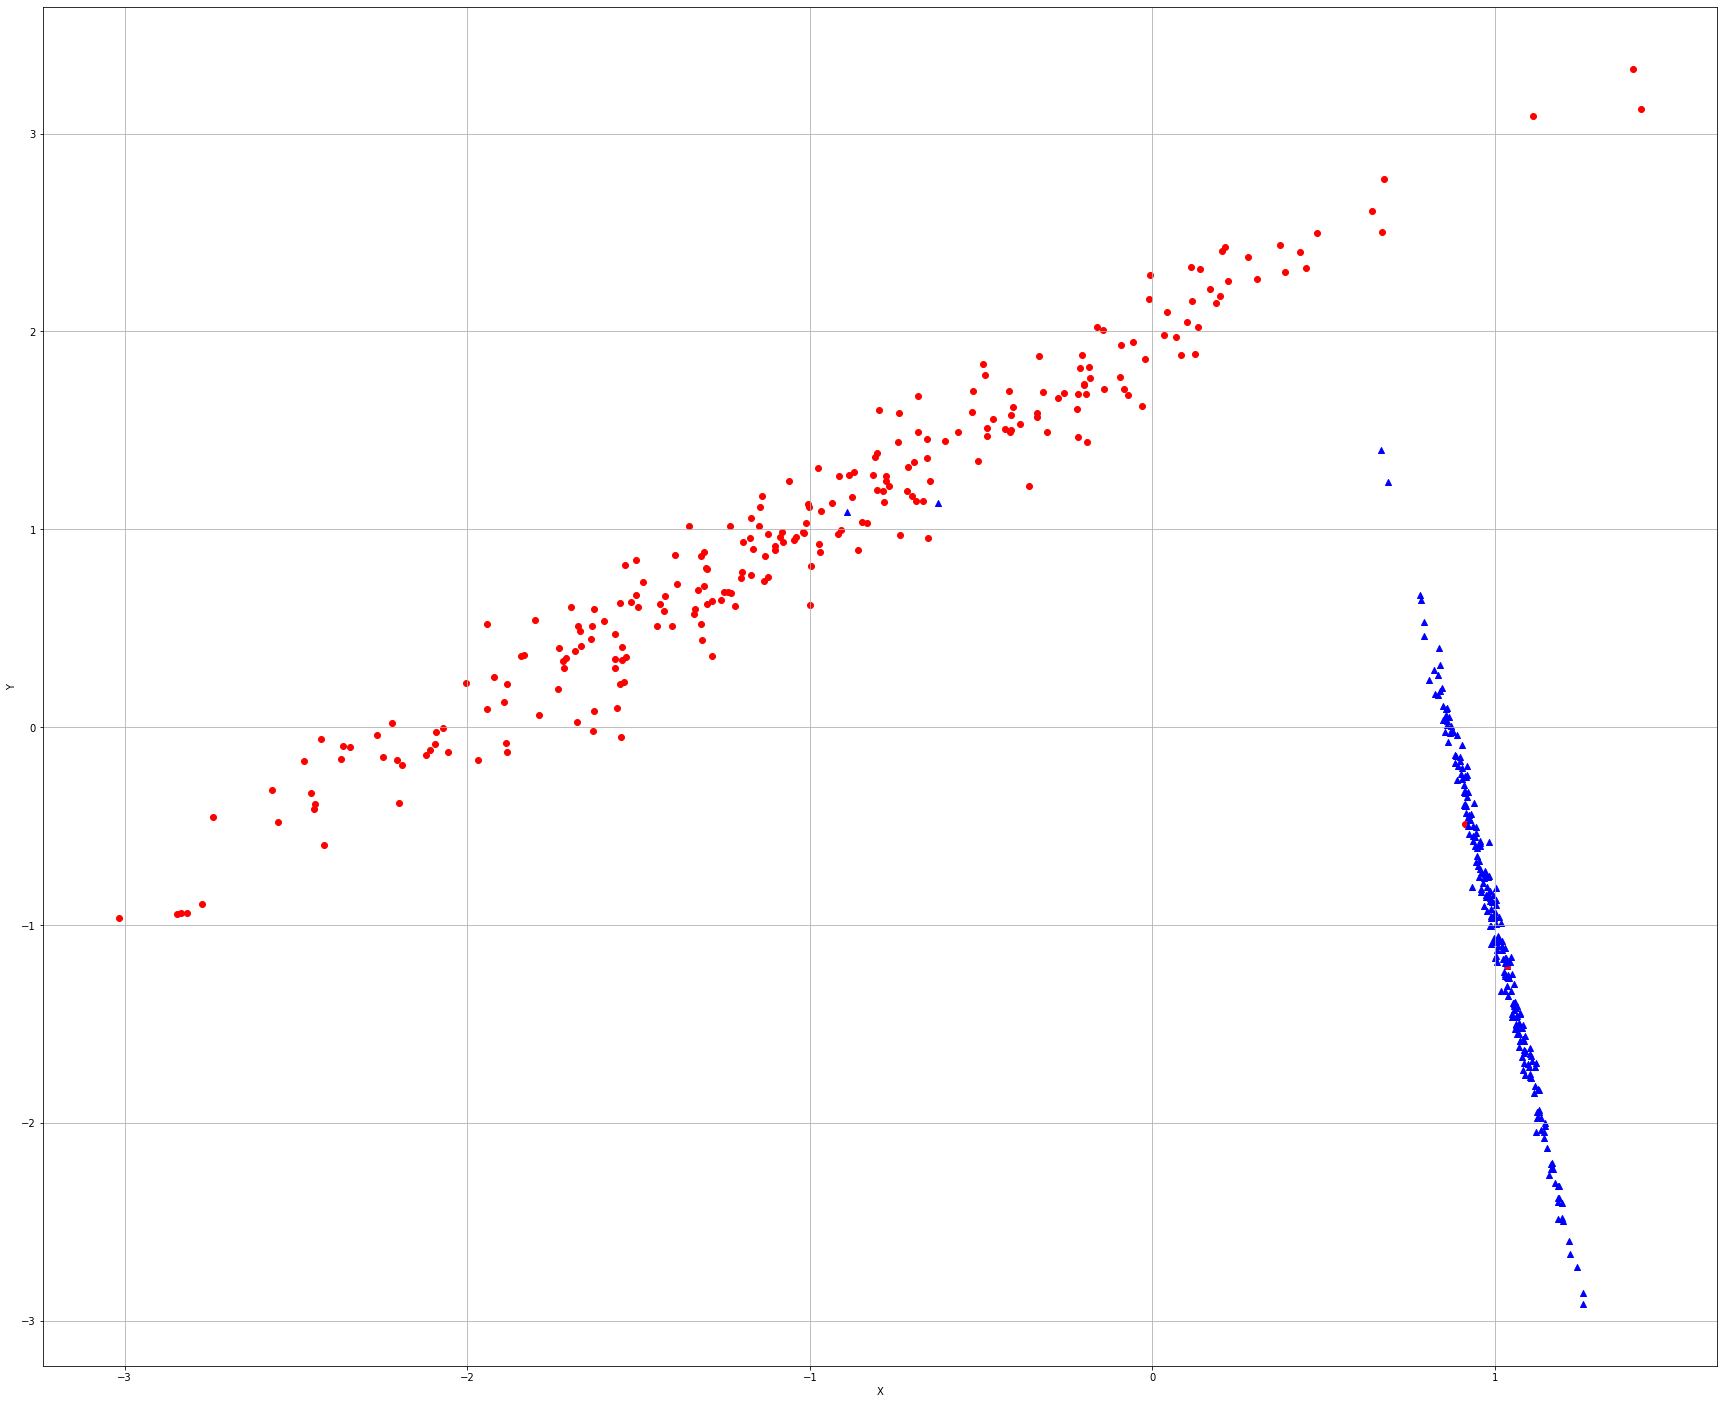

Number of support vectors: 17
Number of support vectors (nu=0.05): 251


In [7]:
from sklearn.svm import SVC, NuSVC
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

# Create and train a linear SVM
svc = SVC(kernel='linear')
svc.fit(X, Y)
print('Number of support vectors: %d' % len(svc.support_vectors_))

# Create and train a Nu-SVM classifier
nusvc = NuSVC(kernel='linear', nu=0.5)
nusvc.fit(X, Y)
print('Number of support vectors (nu=0.05): %d' % len(nusvc.support_vectors_))

In [8]:
print(cross_val_score(nusvc, X, Y, scoring='accuracy', cv=10).mean())

0.9880000000000001
